In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from target_eval import create_target_df
from statistics import mean
from scipy.optimize import curve_fit

from radiometric_calibration import  make_avg_df,create_df

In [31]:
#choose filepath to desired data
data_path = 'C:\\Users\\khart\\Documents\\IRCSP2_data\\Cal_target_analysis\\dec16\\'
calibration_path = 'C:\\Users\\khart\\Documents\\IRCSP2_data\\calibration_files\\'

name1 = 'cam1_center.h5'
name2 = 'cam2_center.h5'

ymin1 = 105; ymax1 = 140;
ymin2 = 130; ymax2 = 165;

cal_file1 =calibration_path + 'cam1pixel.h5'
cal_file2 =calibration_path + 'cam2pixel.h5'

waves= np.linspace(7,12,61)

In [32]:
df1 = create_df(data_path,name1)
df2 = create_df(data_path,name2)
    
corrected_images1= []
corrected_images2= []

for i in range(len(df1)):
    c = pixel_registration(df1['images1'][i],cal_file1,waves,ymin1,ymax1)
    corrected_images1.append(c)

for i in range(len(df2)):
    c = pixel_registration(df2['images1'][i],cal_file2,waves,ymin2,ymax2)
    corrected_images2.append(c)

mean_ims1 = np.mean(corrected_images1,axis = 0)
mean_ims2 = np.mean(corrected_images2,axis = 0)

std_ims1  = np.std(corrected_images1,axis = 0)
std_ims2  = np.std(corrected_images2,axis = 0)
    
d =  {'ims1': list(mean_ims1),'s1': list(std_ims1), 'ims2':list(mean_ims2),'s2': list(std_ims2)}
    
df = pd.DataFrame.from_dict(d, orient='index')
df = df.transpose()


In [33]:
    
#create sum column
df["totalrad"] = df['ims2']+df['ims1']
df["totalstd"] = (df['s2']**2+df['s1']**2)**0.5
df

,ims1,s1,ims2,s2,totalrad,totalstd
0,"[23019.395, 23019.035, 23022.68, 23023.93, 230...","[6.844448480337914, 5.847758117432696, 5.38679...","[22526.625, 22528.57, 22532.155, 22536.965, 22...","[12.679782135352326, 10.00550348558232, 11.110...","[45546.020000000004, 45547.604999999996, 45554...","[14.409141195782626, 11.589062731731154, 12.34..."
1,"[23020.825, 23018.025, 23020.99, 23022.025, 23...","[5.077093164400275, 5.648174483848745, 5.33852...","[22524.935, 22524.62, 22533.565, 22541.48, 225...","[9.368472394152633, 11.088985526187692, 13.843...","[45545.76, 45542.645000000004, 45554.555, 4556...","[10.655756660134463, 12.444576127775512, 14.83..."
2,"[23011.445, 23014.665, 23014.99, 23013.155, 23...","[6.770854820478723, 6.263008462392494, 5.32493...","[22528.075, 22530.23, 22530.21, 22535.255, 225...","[14.442537000125707, 13.114957110109065, 12.84...","[45539.520000000004, 45544.895000000004, 45545...","[15.950904363076095, 14.533663509246399, 13.90..."
3,"[23010.91, 23013.99, 23017.23, 23017.915, 2302...","[4.78088903866216, 4.665822542703484, 5.621129...","[22525.93, 22529.0, 22533.17, 22531.365, 22540...","[12.853991597943418, 12.518985581907186, 10.30...","[45536.84, 45542.990000000005, 45550.399999999...","[13.714299107136318, 13.36019835182098, 11.737..."
4,"[23017.36, 23016.205, 23012.4, 23018.55, 23020...","[5.548008651759653, 5.404209007801232, 5.00499...","[22518.245, 22526.08, 22536.485, 22545.185, 22...","[13.199904355714086, 13.887894008812141, 14.28...","[45535.604999999996, 45542.285, 45548.885, 455...","[14.318445271746498, 14.902317772749317, 15.13..."
5,"[23005.14, 23016.205, 23019.045, 23018.915, 23...","[4.945745646512766, 4.592436717038132, 4.28432...","[22520.005, 22525.97, 22528.61, 22531.77, 2253...","[15.514266821219751, 14.646811939804493, 10.36...","[45525.145000000004, 45542.175, 45547.655, 455...","[16.283515437398645, 15.349904722831326, 11.21..."
6,"[23014.735, 23019.365, 23019.655, 23022.68, 23...","[4.3643183889354376, 4.5043617749909926, 5.472...","[22518.105, 22526.73, 22533.355, 22537.91, 225...","[13.578714040733015, 13.291429569463185, 12.86...","[45532.84, 45546.095, 45553.009999999995, 4556...","[14.262845087849756, 14.033936546813951, 13.97..."
7,"[23013.63, 23014.045, 23020.005, 23030.945, 23...","[5.367317765886418, 4.690999360477464, 4.25587...","[22517.425, 22525.205, 22530.09, 22538.23, 225...","[12.889215453238409, 11.192876082580382, 13.74...","[45531.055, 45539.25, 45550.095, 45569.175, 45...","[13.96209063858274, 12.136142303054951, 14.386..."
8,"[23012.695, 23015.365, 23017.625, 23022.43, 23...","[5.46575475117572, 4.994424391258713, 4.377998...","[22518.24, 22522.78, 22532.29, 22533.895, 2254...","[13.5973306203828, 12.332136878903011, 11.7701...","[45530.935, 45538.145000000004, 45549.915, 455...","[14.654756053923235, 13.305107102161925, 12.55..."
9,"[23007.965, 23013.505, 23020.925, 23031.845, 2...","[4.671859908002379, 4.661810270699571, 5.12999...","[22525.535, 22531.355, 22535.02, 22541.63, 225...","[12.336582792653726, 12.595891195147722, 12.88...","[45533.5, 45544.86, 45555.945, 45573.475000000...","[13.19157117253286, 13.430895353624043, 13.867..."


In [34]:
lut =  h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\calibration_files\\LUT.h5', "r")
As=list(lut['A'])
Bs= list(lut['B'])

In [35]:
def finv(y,A,B):
    return ((y-B)/A)**0.5


#attempt retrival
Ts= np.zeros([35,len(waves)])
for w in range(len(waves)):
    for s in range(35):
        data= list(df['totalrad'])[s][w]
        A= As[s][w]
        B = Bs[s][w]
        t = finv(data,A,B)
        Ts[s][w] = t

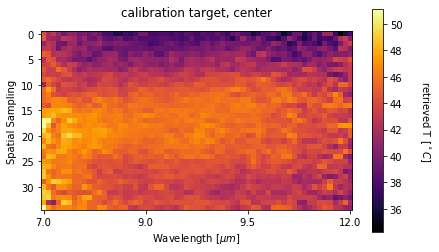

In [42]:

plt.matshow(Ts,cmap = 'inferno' )
cbar = plt.colorbar()
cbar.set_label('retrieved T [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.title('calibration target, center')
#plt.clim(30,60)
plt.show()